In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
import plotly.offline as py#visualization
py.init_notebook_mode()#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import os
#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [90]:
df = pd.read_csv("Dataset/all_stocks_5yr.csv")
df["date"] = pd.to_datetime(df['date'])
df.head()

date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [91]:
df["Name"].unique();

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [93]:
df_apple = df[df["Name"] == "GT"]
df_apple.index = df_apple["date"]
df_google = df[df["Name"] == "GOOGL"]
df_google.index = df_google["date"]
df_fb = df[df["Name"] == "GS"]
df_fb.index = df_fb["date"]
df_amazon = df[df["Name"] == "AAL"]
df_amazon.index = df_amazon["date"]
company_list = [df_apple, df_google, df_fb, df_amazon]
comapny_name = ["APPLE", "GOOGLE", "FACEBOOK", "AMAZON"]

In [94]:
df_apple.to_csv("apple.csv")

In [95]:
big_4 = pd.concat([df_apple, df_google, df_fb, df_amazon], axis = 0)
big_4.head()

date   open    high    low  close    volume Name
date                                                             
2013-02-08 2013-02-08  13.62  13.780  13.32  13.59   5875887   GT
2013-02-11 2013-02-11  13.70  13.930  13.53  13.91   7967771   GT
2013-02-12 2013-02-12  13.55  14.150  13.10  13.86  12293423   GT
2013-02-13 2013-02-13  13.90  14.175  13.90  14.08   7092499   GT
2013-02-14 2013-02-14  14.00  14.200  13.93  14.17   4514455   GT

In [96]:
import pandas_profiling as pf
pf.ProfileReport(big_4.drop(["date"], axis = 1))

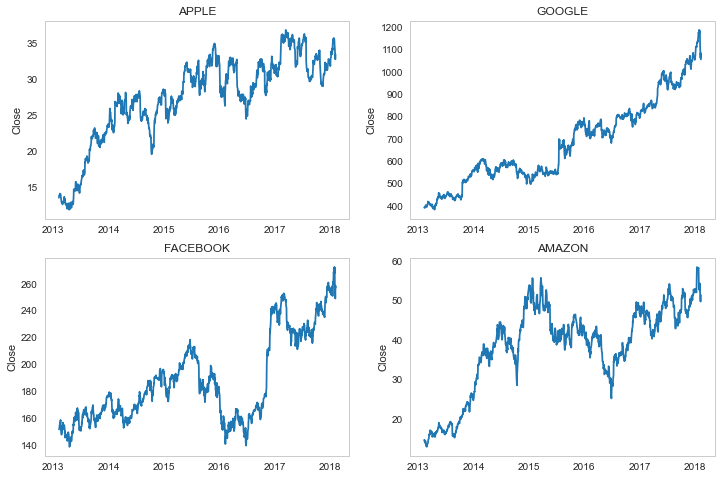

In [97]:
# plot of big_4 close prices

plt.figure(figsize=(12, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company["close"])
    plt.ylabel('Close')
    plt.xlabel(None)
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()

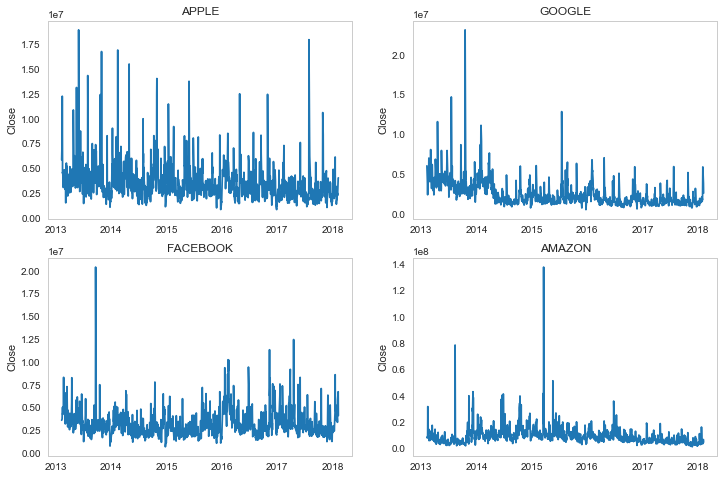

In [98]:
# plot of big_4 close stock volume

plt.figure(figsize=(12, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company["volume"])
    plt.ylabel('Close')
    plt.xlabel(None)
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()

Name
AAL      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GOOGL    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GS       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GT       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

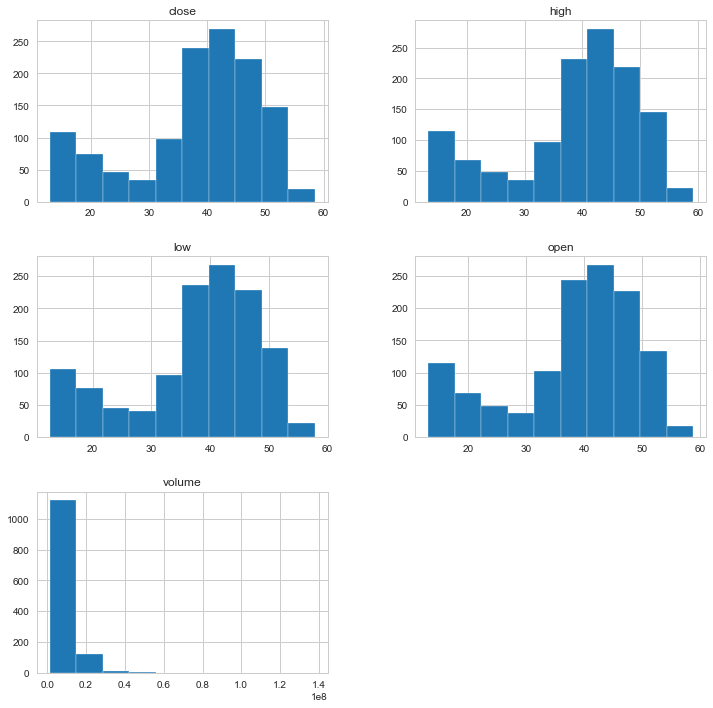

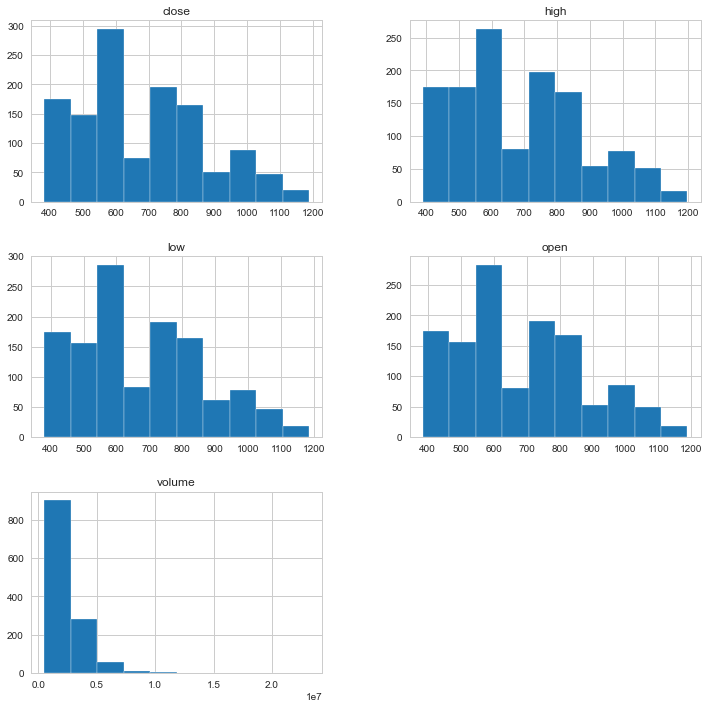

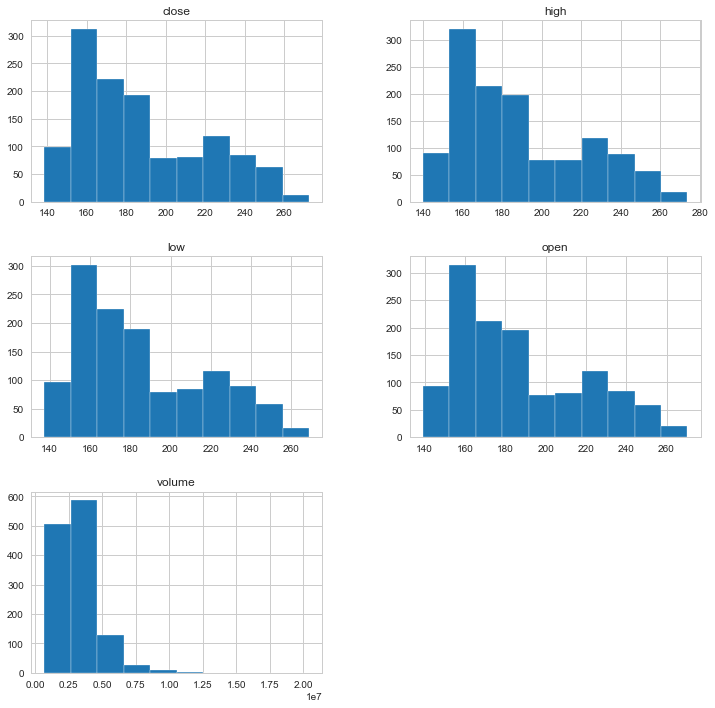

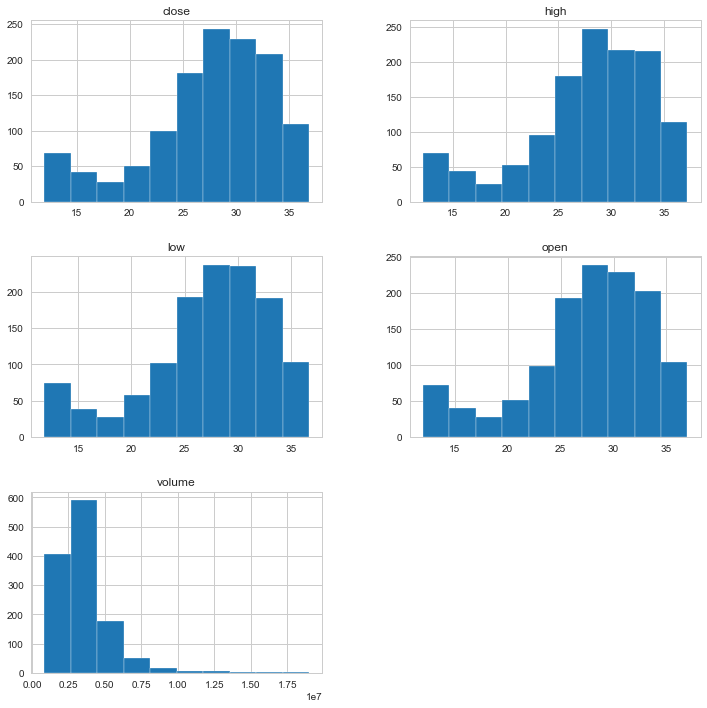

In [99]:
# what are the moving averages for each company stock

moving_average = [10, 20, 50]

for ma in moving_average:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        
        
big_4.groupby("Name").hist(figsize = (12, 12))

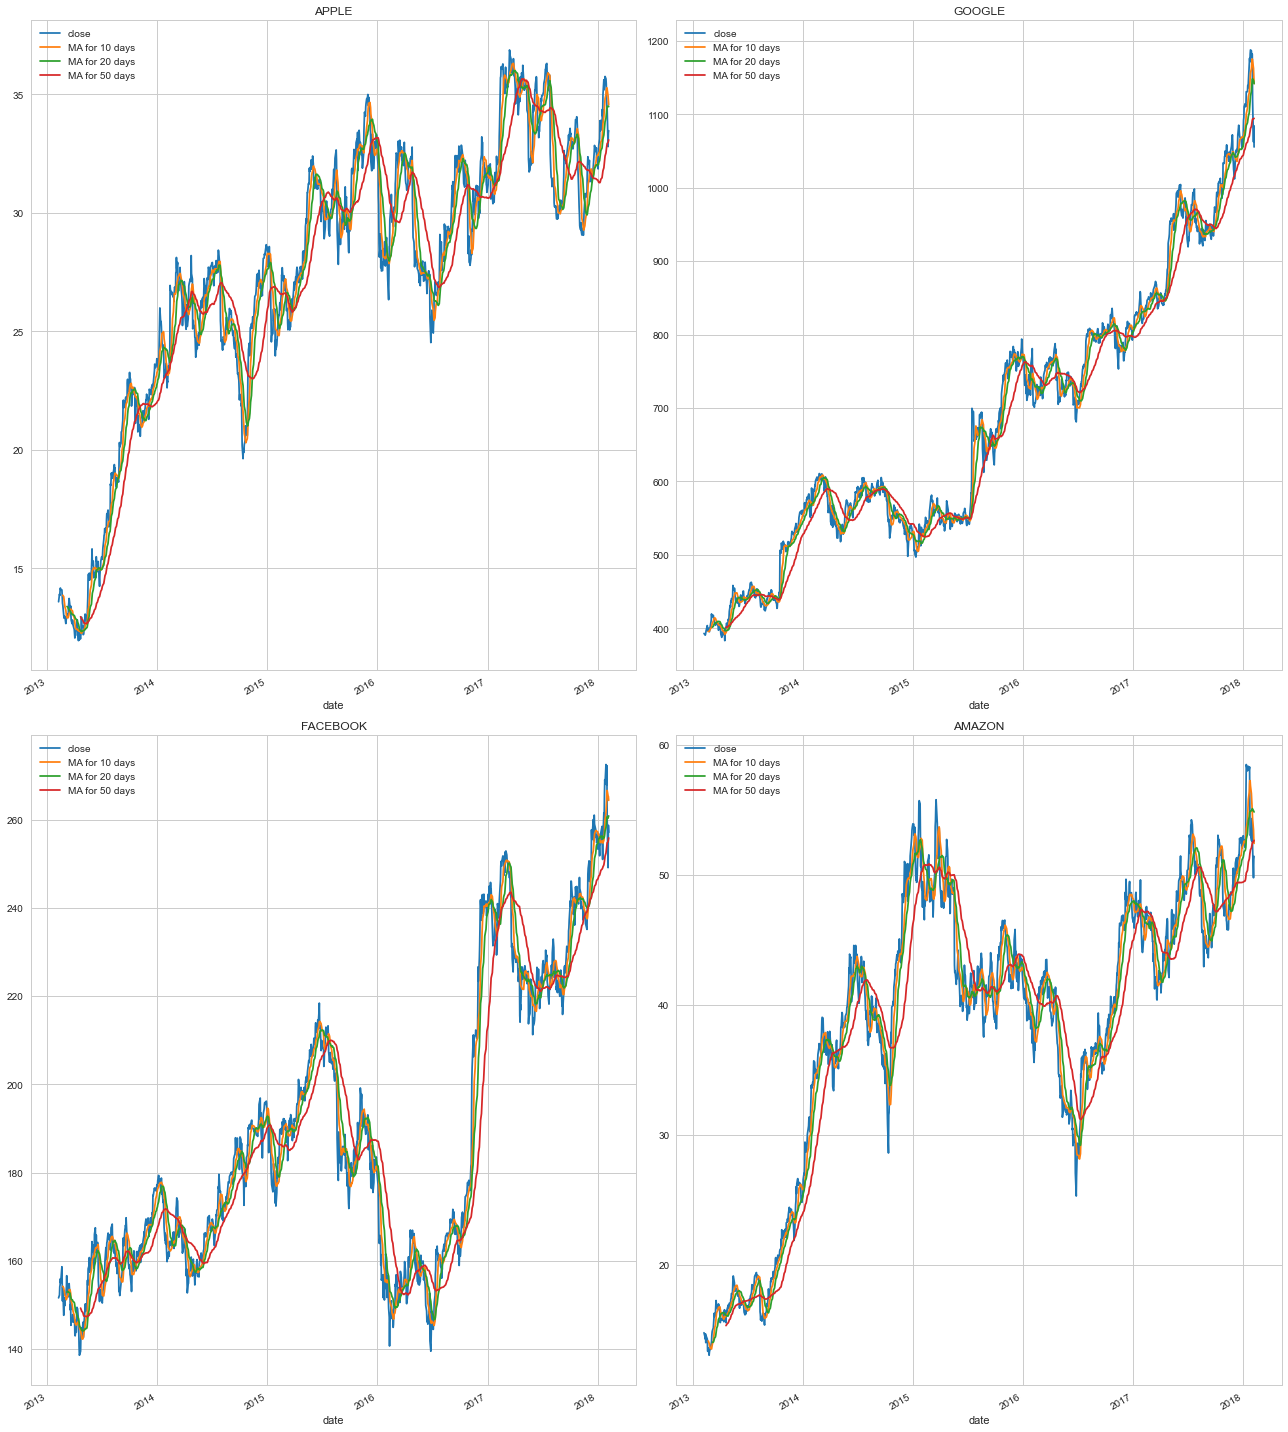

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(18)

df_apple[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

df_google[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

df_fb[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('FACEBOOK')

df_amazon[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

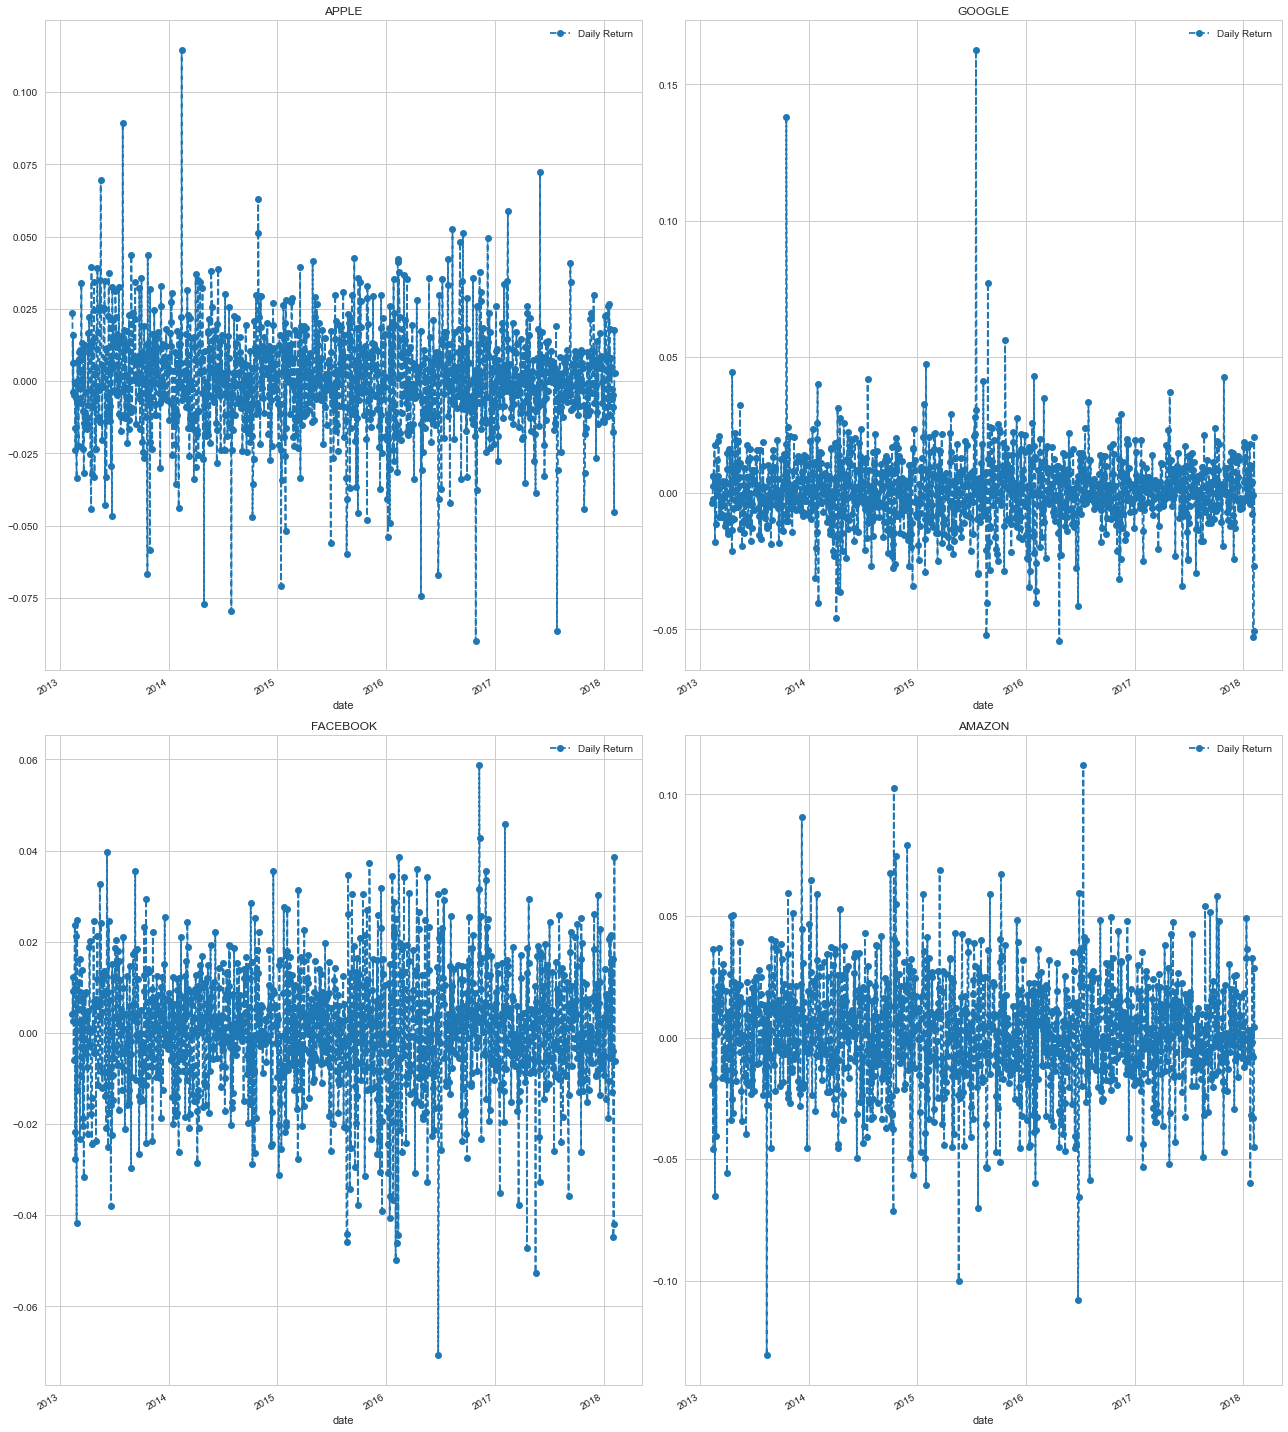

In [101]:
# We will analyze the risk of these companies stock
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()
    
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(18)

df_apple['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

df_google['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

df_fb['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('FACEBOOK')

df_amazon['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

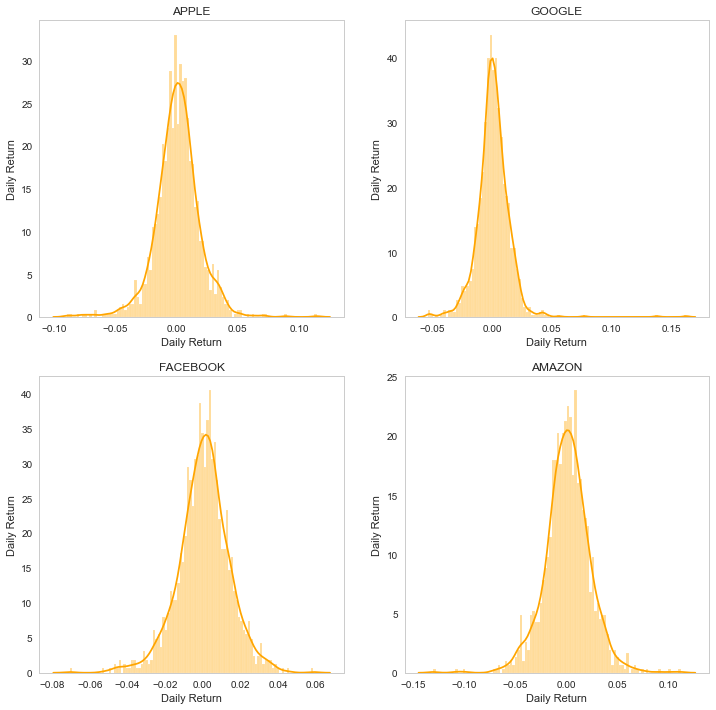

In [102]:
import seaborn as sns

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()


In [103]:
# Predicting Stock prices with LSTM


data_apple = df_apple.filter(["close"])
data_apple = data_apple.values

data_google = df_google.filter(["close"])
data_google = data_google.values

data_amazon = df_amazon.filter(["close"])
data_amazon = data_amazon.values

data_fb = df_fb.filter(["close"])
data_fb = data_fb.values

train_len = int(np.ceil(len(data_apple) * .8))
train_len

1008

### Prophet Introduction:
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.)

#### Steps for using Prophet:
<ul>
<li>Make sure you replace closing price for y and date for ds. </li>
<li>Fit that dataframe to Prophet in order to detect future patterns. </li>
<li>Predict the upper and lower prices of the closing price. </li>
</ul>

In [104]:
#Predicting stock prices with Prophet
# Apple Stock

m_apple = Prophet()
m_google = Prophet()
m_fb = Prophet()
m_amazon = Prophet()

# Drop the columns

ph_df_apple = df_apple[["close", "date"]]
ph_df_apple.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_apple, y_df_apple = ph_df_apple[:1000], ph_df_apple[1000:]

ph_df_google = df_google[["close", "date"]]
ph_df_google.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_google, y_df_google = ph_df_google[:1000], ph_df_google[1000:]

ph_df_amazon = df_amazon[["close", "date"]]
ph_df_amazon.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_amazon, y_df_amazon = ph_df_amazon[:1000], ph_df_amazon[1000:]

ph_df_fb = df_apple[["close", "date"]]
ph_df_fb.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_fb, y_df_fb = ph_df_fb[:1000], ph_df_fb[1000:]


train_df_fb.head()

y         ds
date                        
2013-02-08  13.59 2013-02-08
2013-02-11  13.91 2013-02-11
2013-02-12  13.86 2013-02-12
2013-02-13  14.08 2013-02-13
2013-02-14  14.17 2013-02-14

In [105]:
m_apple.fit(train_df_apple)
m_google.fit(train_df_google)
m_fb.fit(train_df_fb)
m_amazon.fit(train_df_amazon)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [106]:
forcast_apple = m_apple.predict(y_df_apple[["ds"]])
forcast_fb = m_fb.predict(y_df_fb[["ds"]])
forcast_google = m_google.predict(y_df_google[["ds"]])
forcast_amazon = m_amazon.predict(y_df_amazon[["ds"]])


forcast_apple.index = forcast_apple['ds']
forcast_google.index = forcast_google['ds']
forcast_fb.index = forcast_fb['ds']
forcast_amazon.index = forcast_amazon["ds"]

In [107]:
ph_df_y_apple = ph_df_apple[["y"]]
ph_df_y_google = ph_df_google[["y"]]
ph_df_y_amazon = ph_df_amazon[["y"]]
ph_df_y_fb = ph_df_fb[["y"]]

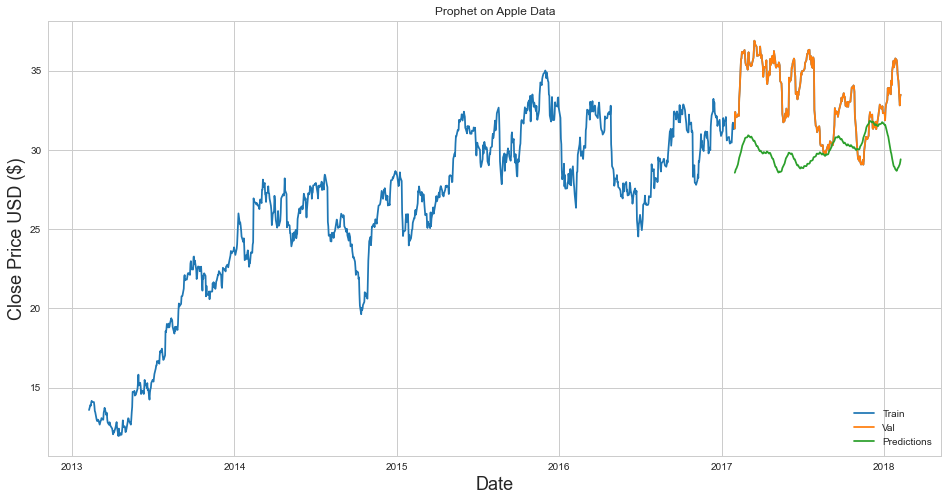

In [108]:
# Plot the data
train_ph_apple = ph_df_apple["y"].values
valid_ph_apple = ph_df_apple['y'][1000:].values
pred = forcast_apple
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Apple Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_apple['y'])
plt.plot(ph_df_y_apple['y'][1000:])
plt.plot(pred["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


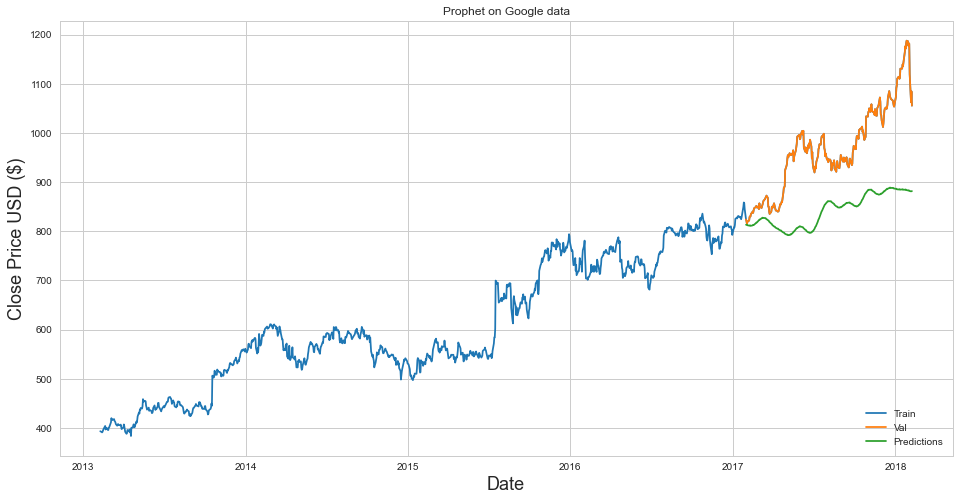

In [109]:
# Plot the data
train_ph_google = ph_df_google["y"].values
valid_ph_google = ph_df_google['y'][1000:].values
pred_google = forcast_google
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Google data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_google['y'])
plt.plot(ph_df_y_google['y'][1000:])
plt.plot(pred_google["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

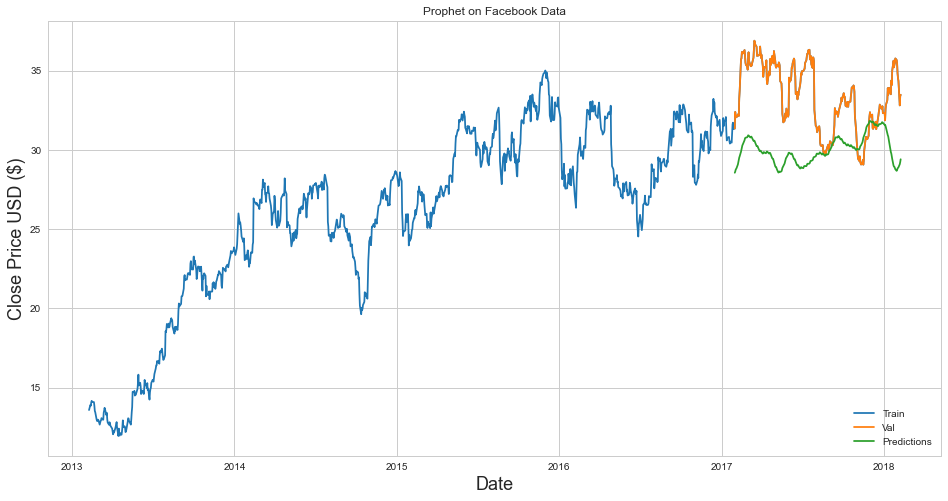

In [110]:
# Plot the data
train_ph_fb = ph_df_fb["y"].values
valid_ph_fb = ph_df_fb['y'][1000:].values
pred_fb = forcast_fb
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Facebook Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_fb['y'])
plt.plot(ph_df_y_fb['y'][1000:])
plt.plot(pred_fb["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

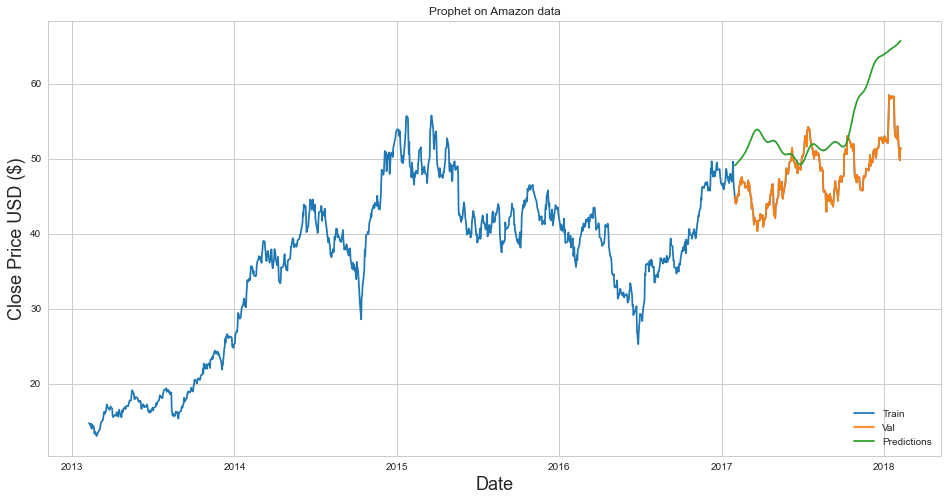

In [111]:
# Plot the data
train_ph_amazon = ph_df_amazon["y"].values
valid_ph_amazon = ph_df_amazon['y'][1000:].values
pred_amazon = forcast_amazon
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Amazon data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_amazon['y'])
plt.plot(ph_df_y_amazon['y'][1000:])
plt.plot(pred_amazon["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Reccurent Neural Network

In [112]:
from sklearn.preprocessing import MinMaxScaler

train_len_apple = int(np.ceil(len(data_apple) * .8))
train_len_google = int(np.ceil(len(data_google) * .8))
train_len_fb = int(np.ceil(len(data_fb) * .8))
train_len_amazon = int(np.ceil(len(data_amazon) * .8))


scale = MinMaxScaler(feature_range = (0, 1))
scale_data_apple = scale.fit_transform(data_apple)
scale_data_fb = scale.fit_transform(data_fb)
scale_data_amazon = scale.fit_transform(data_amazon)
scale_data_google = scale.fit_transform(data_google)


train_data_apple = scale_data_apple[0:int(train_len_apple), :]
train_data_google = scale_data_google[0:int(train_len_google), :]
train_data_amazon = scale_data_amazon[0:int(train_len_amazon), :]
train_data_fb = scale_data_fb[0:int(train_len_fb), :]


X_train_apple = []
y_train_apple = []

X_train_google = []
y_train_google = []

X_train_fb = []
y_train_fb = []

X_train_amazon = []
y_train_amazon = []


for i in range(60, len(train_data_apple)):
    X_train_apple.append(train_data_apple[i-60:i, 0])
    y_train_apple.append(train_data_apple[i, 0])
    if i<=61:
        print(X_train_apple)
        print(y_train_apple)
        print()
        
for i in range(60, len(train_data_google)):
    X_train_google.append(train_data_google[i-60:i, 0])
    y_train_google.append(train_data_google[i, 0])
    if i<=61:
        print(X_train_google)
        print(y_train_google)
        print()
        
for i in range(60, len(train_data_amazon)):
    X_train_amazon.append(train_data_amazon[i-60:i, 0])
    y_train_amazon.append(train_data_amazon[i, 0])
    if i<=61:
        print(X_train_amazon)
        print(y_train_amazon)
        print()
        
        
for i in range(60, len(train_data_fb)):
    X_train_fb.append(train_data_fb[i-60:i, 0])
    y_train_fb.append(train_data_fb[i, 0])
    if i<=61:
        print(X_train_fb)
        print(y_train_fb)
        print()
        
X_train_apple, y_train_apple = np.array(X_train_apple), np.array(y_train_apple);
X_train_google, y_train_google = np.array(X_train_google), np.array(y_train_google);
X_train_fb, y_train_fb = np.array(X_train_fb), np.array(y_train_fb);
X_train_amazon, y_train_amazon = np.array(X_train_amazon), np.array(y_train_amazon);

[array([0.0657842 , 0.07862014, 0.07661452, 0.08543923, 0.08904934,
       0.08624148, 0.08584035, 0.07661452, 0.06337746, 0.06016847,
       0.04211793, 0.0381067 , 0.0381067 , 0.04151625, 0.04051344,
       0.02888087, 0.03409547, 0.0381067 , 0.03971119, 0.04532692,
       0.04131568, 0.04131568, 0.0589651 , 0.0641797 , 0.07139992,
       0.05856398, 0.05294826, 0.05876454, 0.04171681, 0.03409547,
       0.02847974, 0.03489771, 0.0328921 , 0.02627357, 0.01885279,
       0.01062976, 0.00441235, 0.01239471, 0.00842359, 0.01925391,
       0.02406739, 0.03012435, 0.03529884, 0.02226233, 0.        ,
       0.01885279, 0.00280786, 0.00120337, 0.00762134, 0.00320899,
       0.0104292 , 0.0224629 , 0.03971119, 0.0224629 , 0.02486963,
       0.02186121, 0.01002808, 0.01123145, 0.01674689, 0.03610108])]
[0.04492579221821108]

[array([0.0657842 , 0.07862014, 0.07661452, 0.08543923, 0.08904934,
       0.08624148, 0.08584035, 0.07661452, 0.06337746, 0.06016847,
       0.04211793, 0.0381067 , 0.03

In [113]:
X_train_apple = np.reshape(X_train_apple, (X_train_apple.shape[0], X_train_apple.shape[1], 1))
X_train_google = np.reshape(X_train_google, (X_train_google.shape[0], X_train_google.shape[1], 1))
X_train_fb = np.reshape(X_train_fb, (X_train_fb.shape[0], X_train_fb.shape[1], 1))
X_train_amazon = np.reshape(X_train_amazon, (X_train_amazon.shape[0], X_train_amazon.shape[1], 1))

In [114]:
X_train_fb.shape

(948, 60, 1)

In [148]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import Callback, EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE



def Create_LSTM_Model(inp, unit_per_layer=1000, drop_out=0.5, optimizer='Adam', lr=1e-3):
    # Create model with LSTM & Dense layers
    model = Sequential()
    model.add(LSTM(units=unit_per_layer, input_shape=inp, return_sequences=True))
    model.add(Dropout(drop_out))
    model.add(BatchNormalization())
    model.add(LSTM(units=unit_per_layer))     
    model.add(Dropout(drop_out))
    model.add(BatchNormalization())
    model.add(Dense(units=unit_per_layer))
    model.add(Dropout(drop_out))
    model.add(BatchNormalization())
    model.add(Dense(units=5, activation='softmax'))

    if optimizer.upper()=='ADAM':
        opti_func = Adam(lr=lr, amsgrad=True)
    elif optimizer.upper()=='SGD':
        opti_func = SGD(lr=lr)
    elif optimizer.upper()=='RMSPROP':
        opti_func = RMSprop(lr=lr)
              
    model.compile(optimizer=opti_func, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
   
    return model


#Build the LSTM model
model_apple = Create_LSTM_Model(unit_per_layer = 1000, drop_out = 0.5, optimizer = 'Adam')
model_apple.fit(X_train_apple, y_train_apple, batch_size = 1, epochs = 10)

NameError: name 'time_steps' is not defined

In [121]:

model_google = Sequential()
model_google.add(LSTM(50, return_sequences=True, input_shape= (X_train_google.shape[1], 1)))
model_google.add(Dropout(0.5))
model_google.add(LSTM(50, return_sequences= True))
model_google.add(Dropout(0.5))
model_google.add(LSTM(units=50,return_sequences=True))
model_google.add(Dropout(0.5))
model_google.add(LSTM(units=50,return_sequences=True))
model_google.add(Dropout(0.5))
model_google.add(Dense(25))
model_google.add(Dense(1))


model_google.compile(optimizer = "adam", loss = "mean_squared_error")
model_google.fit(X_train_google, y_train_google, batch_size = 1, epochs = 20)

Epoch 1/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0077
Epoch 2/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0054
Epoch 3/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0048
Epoch 4/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0048
Epoch 5/20
948/948 [==============================] - 8s 8ms/step - loss: 0.0045
Epoch 6/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0045
Epoch 7/20
948/948 [==============================] - 8s 8ms/step - loss: 0.0042
Epoch 8/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0039
Epoch 9/20
948/948 [==============================] - 8s 8ms/step - loss: 0.0039
Epoch 10/20
948/948 [==============================] - 8s 9ms/step - loss: 0.0040
Epoch 11/20
948/948 [==============================] - 9s 9ms/step - loss: 0.0039
Epoch 12/20
948/948 [==============================] - 10s 11ms/step - loss: 0.0038
Epoch 13/20
948/948 [==

In [122]:

model_fb = Sequential()
model_fb.add(LSTM(50, return_sequences=True, input_shape= (X_train_fb.shape[1], 1)))
model_fb.add(LSTM(50, return_sequences= False))
model_fb.add(Dense(25))
model_fb.add(Dense(1))


model_fb.compile(optimizer = "adam", loss = "mean_squared_error")
model_fb.fit(X_train_fb, y_train_fb, batch_size = 1, epochs = 2)

Epoch 1/2
948/948 [==============================] - 5s 5ms/step - loss: 0.0022
Epoch 2/2
948/948 [==============================] - 5s 5ms/step - loss: 0.0011


In [134]:
from tensorflow.keras.layers import Activation, Dropout
model_amazon = Sequential()
model_amazon.add(LSTM(50, return_sequences=True, input_shape= (X_train_amazon.shape[1], 1)))
model_amazon.add(Dropout(0.2))
model_amazon.add(LSTM(128, return_sequences= False))
model_amazon.add(Dropout(0.2))
#model_amazon.add(Dense(25))
model_amazon.add(Dense(1))
model_amazon.add(Activation("linear"))


model_amazon.compile(optimizer = "adam", loss = "mean_squared_error")
model_amazon.fit(X_train_amazon, y_train_amazon, batch_size = 1, epochs = 2)

Epoch 1/2
948/948 [==============================] - 11s 12ms/step - loss: 0.0066
Epoch 2/2
948/948 [==============================] - 12s 12ms/step - loss: 0.0035


In [135]:


#Create the testing data set for apple
#Create a new array containing scaled values from index 1543 to 2002 
test_data_apple = scale_data_apple[train_len_apple - 60:, :]
#Create the data sets x_test and y_test
x_test_apple = []
y_test_apple = data_apple[train_len_apple:, :]
for i in range(60, len(test_data_apple)):
    x_test_apple.append(test_data_apple[i-60:i, 0])
    
# Convert the data to a numpy array
x_test_apple = np.array(x_test_apple)

# Reshape the data
x_test_apple = np.reshape(x_test_apple, (x_test_apple.shape[0], x_test_apple.shape[1], 1))


#Create the testing data set for google
#Create a new array containing scaled values from index 1543 to 2002 
test_data_google = scale_data_google[train_len_google - 60:, :]
#Create the data sets x_test and y_test
x_test_google = []
y_test_google = data_google[train_len_google:, :]
for i in range(60, len(test_data_google)):
    x_test_google.append(test_data_google[i-60:i, 0])
    
# Convert the data to a numpy array
x_test_google = np.array(x_test_google)

# Reshape the data
x_test_google = np.reshape(x_test_google, (x_test_google.shape[0], x_test_google.shape[1], 1 ))



#Create the testing data set for google
#Create a new array containing scaled values from index 1543 to 2002 
test_data_fb = scale_data_fb[train_len_fb - 60:, :]
#Create the data sets x_test and y_test
x_test_fb = []
y_test_fb = data_fb[train_len_fb:, :]
for i in range(60, len(test_data_fb)):
    x_test_fb.append(test_data_fb[i-60:i, 0])
    
# Convert the data to a numpy array
x_test_fb = np.array(x_test_fb)

# Reshape the data
x_test_fb = np.reshape(x_test_fb, (x_test_fb.shape[0], x_test_fb.shape[1], 1 ))


#Create the testing data set for google
#Create a new array containing scaled values from index 1543 to 2002 
test_data_amazon = scale_data_amazon[train_len_amazon - 60:, :]
#Create the data sets x_test and y_test
x_test_amazon = []
y_test_amazon = data_amazon[train_len_amazon:, :]
for i in range(60, len(test_data_amazon)):
    x_test_amazon.append(test_data_amazon[i-60:i, 0])
    
# Convert the data to a numpy array
x_test_amazon = np.array(x_test_amazon)

# Reshape the data
x_test_amazon = np.reshape(x_test_amazon, (x_test_amazon.shape[0], x_test_amazon.shape[1], 1))

In [137]:
# Get the models predicted price values apple
predictions_apple = model_apple.predict(x_test_apple)
predictions_apple = scale.inverse_transform(predictions_apple)

# Get the root mean squared error (RMSE)
rmse_apple = np.sqrt(np.mean(((predictions_apple - y_test_apple) ** 2)))
print(rmse_apple)

# Get the models predicted price values google
predictions_google = model_google.predict(x_test_google)
predictions_google = scale.inverse_transform(predictions_google)

# Get the root mean squared error (RMSE)
rmse_google = np.sqrt(np.mean(((predictions_google - y_test_google) ** 2)))
print(rmse_google)

# Get the models predicted price values fb
predictions_fb = model_fb.predict(x_test_fb)
predictions_fb = scale.inverse_transform(predictions_fb)

# Get the root mean squared error (RMSE)
rmse_fb = np.sqrt(np.mean(((predictions_fb - y_test_fb) ** 2)))
print(rmse_fb)

# Get the models predicted price values amazon
predictions_amazon = model_amazon.predict(x_test_amazon)
predictions_amazon = scale.inverse_transform(predictions_amazon)

# Get the root mean squared error (RMSE)
rmse_amazon = np.sqrt(np.mean(((predictions_amazon - y_test_amazon) ** 2)))
rmse_amazon

1072.9261418937203


ValueError: Found array with dim 3. Estimator expected <= 2.

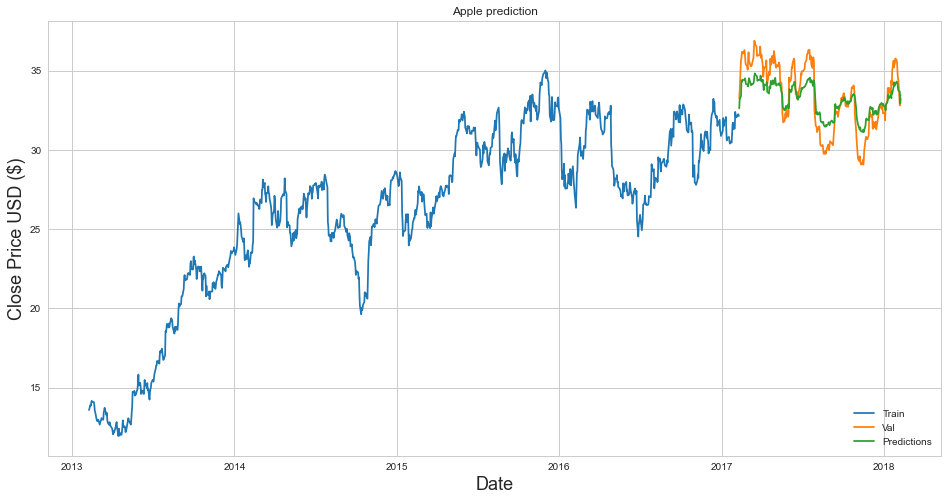

In [138]:
# Plot the data
train_apple = df_apple[:train_len_apple]
valid_apple = df_apple[train_len_apple:]
valid_apple['Predictions'] = np.sqrt(predictions_apple)
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_apple['close'])
plt.plot(valid_apple[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [139]:
train_google = df_google[:train_len_google]
valid_google = df_google[train_len_google:]
valid_google['Predictions'] = predictions_google 
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Google prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_google['close'])
plt.plot(valid_google[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

AssertionError: Shape of new values must be compatible with manager shape

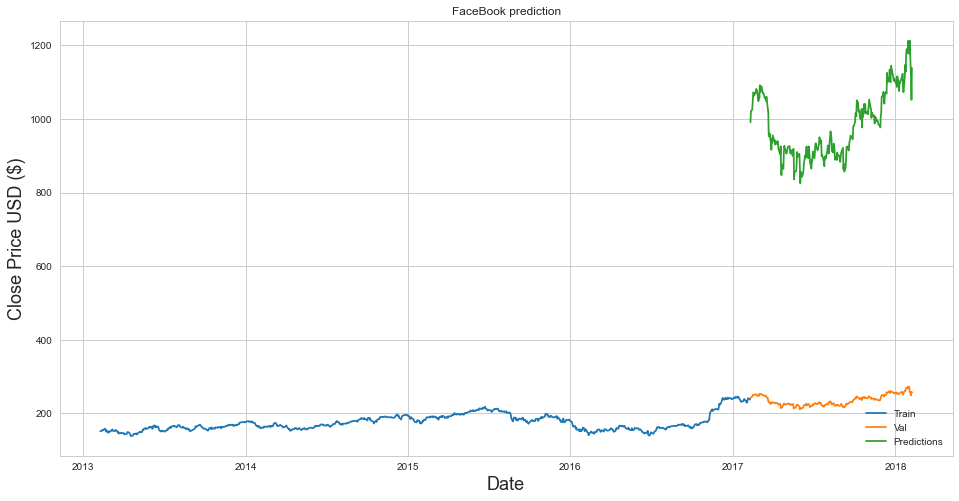

In [140]:
train_fb = df_fb[:train_len]
valid_fb = df_fb[train_len:]
valid_fb['Predictions'] = predictions_fb
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('FaceBook prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_fb['close'])
plt.plot(valid_fb[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

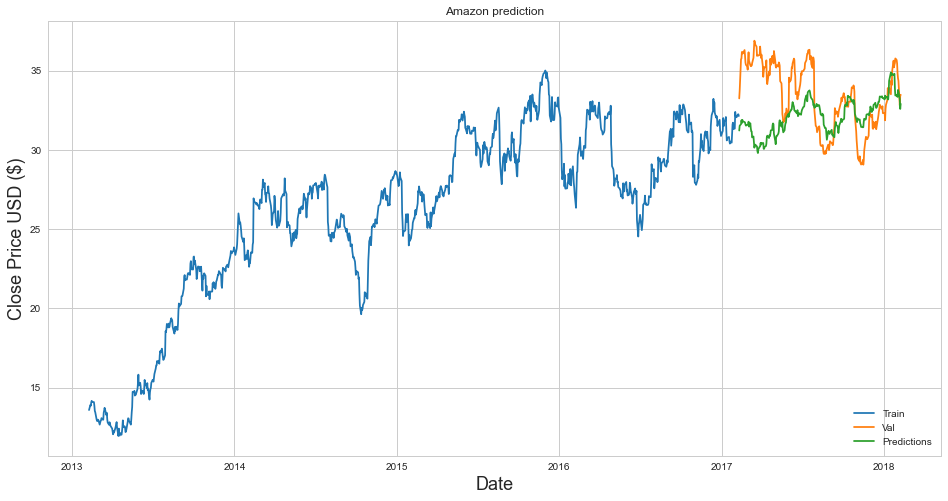

In [141]:
train_amazon = df_apple[:train_len]
valid_amazon = df_apple[train_len:]
valid_amazon['Predictions'] = np.sqrt(predictions_amazon)
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Amazon prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_amazon['close'])
plt.plot(valid_amazon[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [144]:
from sklearn.metrics import r2_score
print("Apple Accuracy: {}".format(r2_score(valid_apple['close'], valid_apple['Predictions'])))

Apple Accuracy: 0.6819172620067055
